# 1. Importing Libraries

In [475]:
# importing the required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# 2. Overview of the Data Set

In [476]:
# read the dataset using pandas 
bikeSharing_df = pd.read_csv('day.csv')

In [477]:
# inspecting the first few rows and columns of the dataset
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [478]:
# check for null values and data types
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [479]:
# check the shape 
bikeSharing_df.shape

(730, 16)

In [480]:
# overview of numerical values in rows
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### The dataset "day.csv" contains 730 rows and 16 columns. It does not contain any null values.

# 3. Cleaning the Dataset

## 3.1 Applying cosmetic changes to Data set

- re-mapping the columns `season`, `weekday`, `mnth`, `weathersit` to categorical types for better readability

In [481]:
# mapping "season" column
bikeSharing_df.season = bikeSharing_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# mapping "weekday" column
bikeSharing_df.weekday = bikeSharing_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# mapping "mnth" column
bikeSharing_df.mnth = bikeSharing_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# mapping "weathersit" column
bikeSharing_df.weathersit = bikeSharing_df.weathersit.map({1:'good',2:'moderate',3:'bad',4:'severe'})

In [482]:
# inspect the data set
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [483]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


## 3.2 Dropping columns which are not useful for analysis

- `instant` is just a row instance identifier or index feature, so we can drop the column and use the default index column for indexation purposes.
- `dteday` can be dropped as we have other date features like `mnth` and `year` and `weekday` in other columns and also because we will not be considering day to day trend in demand for bikes for this analysis.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage. Thus, these columns can be dropped as well.

In [484]:
# before dropping "dteday", let us introduce "days_old" variable which would indicate how old the particular recorded instance is
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [485]:
# dropping "instant", "dteday", "casual", "registered" columns

bikeSharing_df.drop(['instant'], axis=1, inplace=True)
bikeSharing_df.drop(['dteday'], axis=1, inplace=True)
bikeSharing_df.drop(['casual'], axis=1, inplace=True)
bikeSharing_df.drop(['registered'], axis=1, inplace=True)

In [486]:
# inspect after dropping columns
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [487]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


## 3.3 Handling Missing Values
Let us verify once again if the data set contains any missing/null values

In [488]:
# show null values by column
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

## 3.4 Handling Outliers

- We can look for outliers in the data set by drawing boxplots for any columns having continous values like `temp`, `atemp`, `hum`, `windspeed`

In [489]:
# show the number of unique values in each column
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

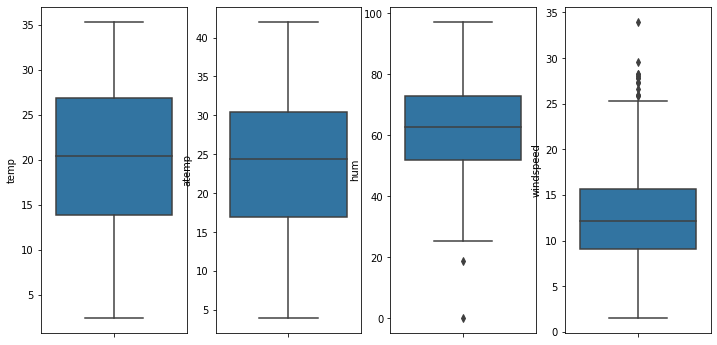

In [490]:
# Draw box plots 

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(12,6))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

#### These plots show no significant outliers in the data set. 

# 4. Exploratory Data Analysis

## 4.1 Check for Linear Relationships between any Variables

<Figure size 1080x2160 with 0 Axes>

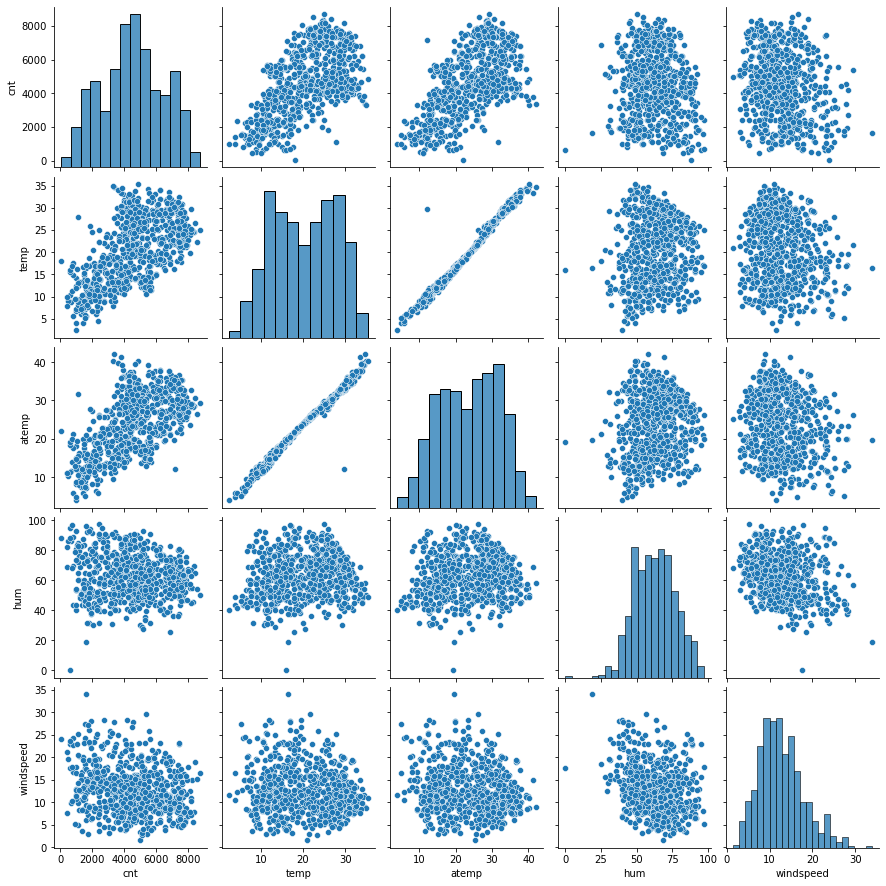

In [491]:
#Draw pairplots using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Inference:
#### `temp` and `atemp` have the highest correlation and linear relationship with the target variable `cnt`

## 4.2 Check for individual correlation between any Variables

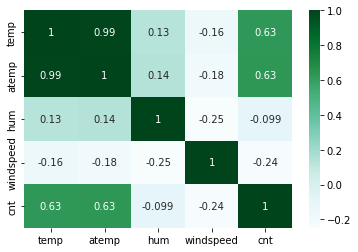

In [492]:
# draw heatmap to check for correlation
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Inference: 
`temp` and `atemp` have high correlation of 0.99. this is expected because `atemp` is derived from `temp`. we may choose to drop one of them, but let us keep both for this analysis

## 4.3 Check for correlation between all Variables

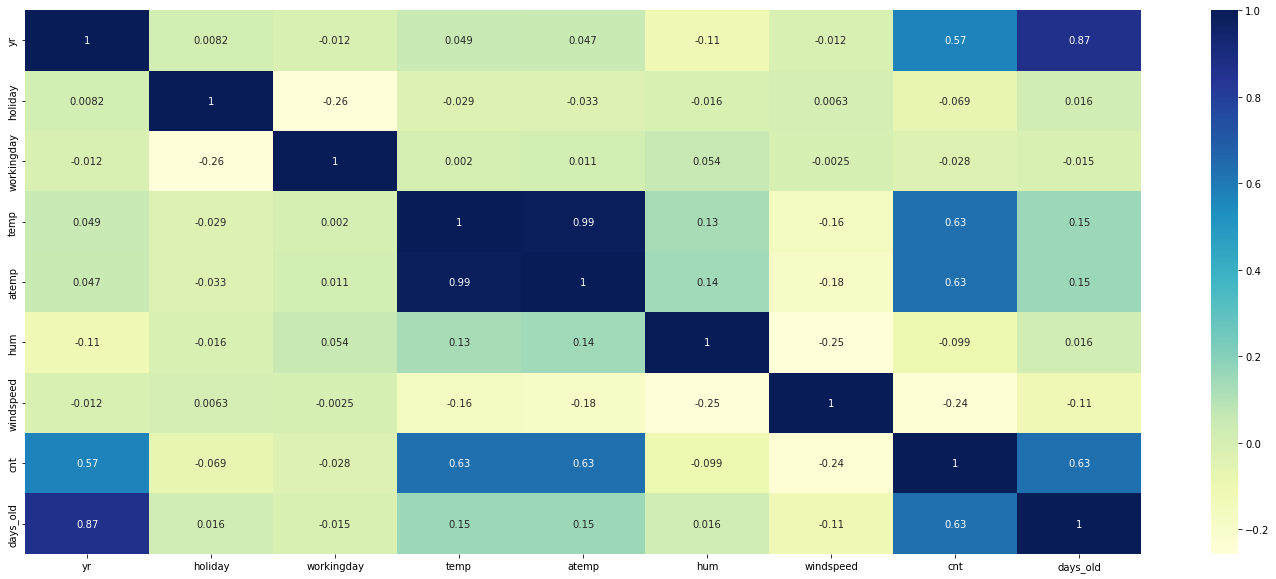

In [493]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### Inference:
`temp`, `atemp` and `days_old` seem to be correlated 

## 4.4 Analysing Categorical Variables with Target Variable

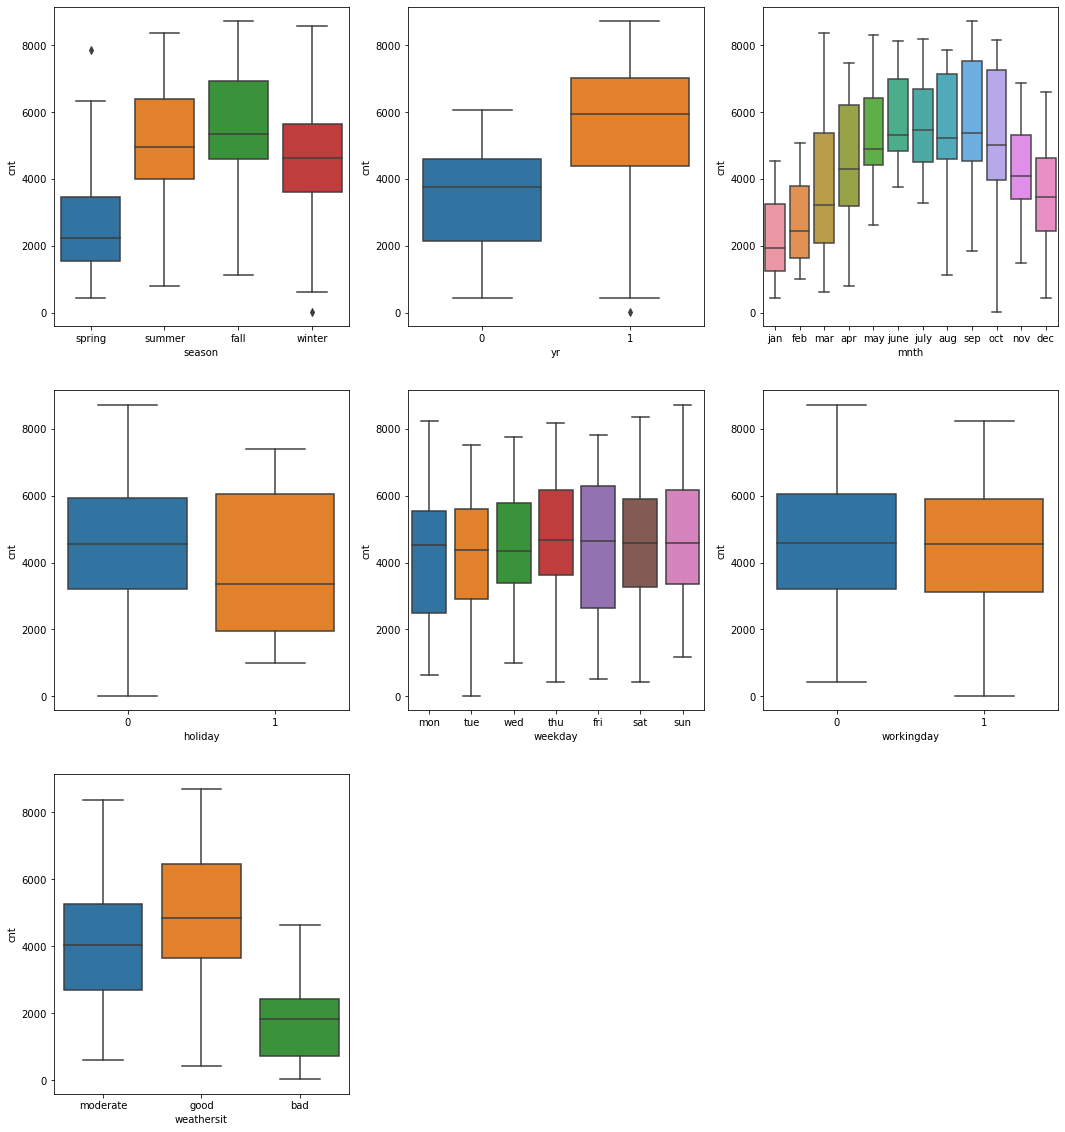

In [494]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(18, 20))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

#### Inferences:
1. fall season has highest demand for rental bikes
2. demand for next year has grown considerably
3. september has highest demand
4. interestingly, month on month demand is following somewhat normal distribution. this could be due to relatively extreme temperatures in the start and end of the year
5. demand has decreased on holidays
6. weekday is not giving clear picture abount demand
7. good, clear weather genereates highest demand 

## 4.5 Analysing Target Variable against Numerical Variables

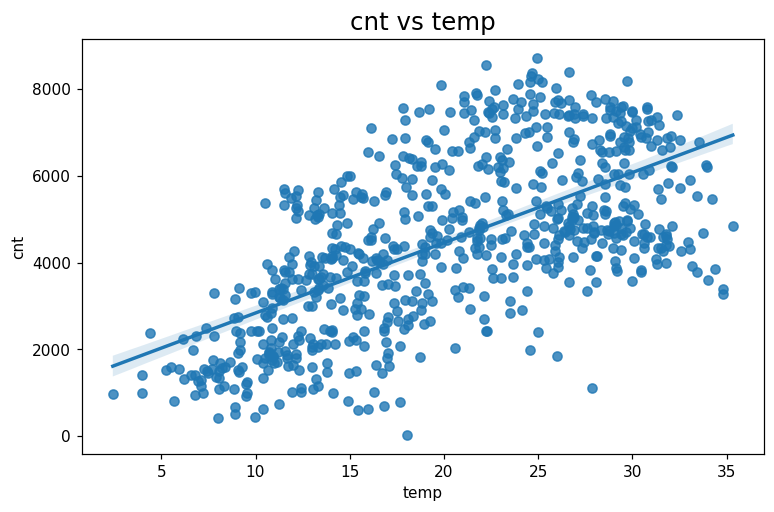

In [495]:
# scatterplot of "cnt" vs "temp"
plt.figure(figsize=(8,5),dpi=110)
plt.title("cnt vs temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.show()

#### Inference:
we see clear positive correlation between `cnt` and `temp`. we can label this as linear correlation

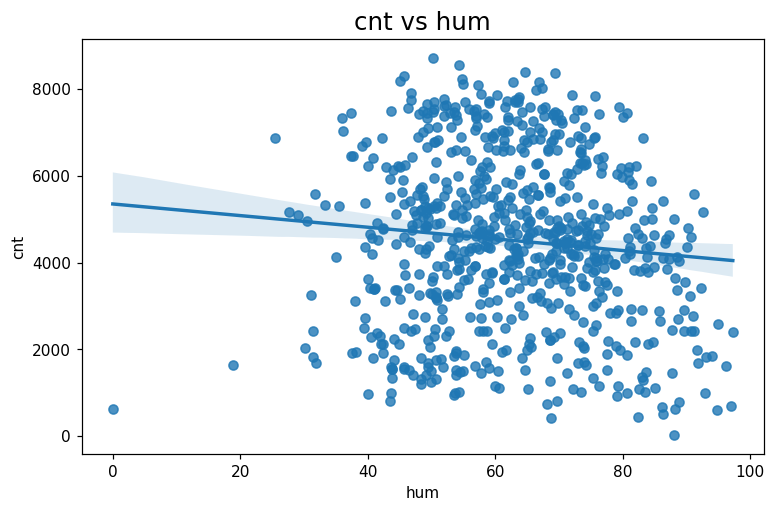

In [496]:
# scatterplot of "cnt" vs "hum"
plt.figure(figsize=(8,5),dpi=110)
plt.title("cnt vs hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.show()

#### Inference:
we see a negative correlation between `cnt` and `hum`. moreover, the values are more scattered

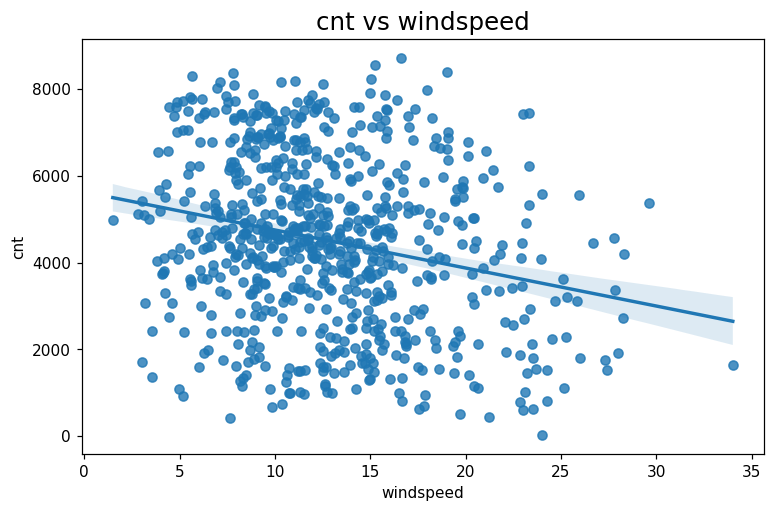

In [497]:
# scatterplot of "cnt" vs "windspeed"
plt.figure(figsize=(8,5),dpi=110)
plt.title("cnt vs windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

#### Inference:
we see a negative correlation between `cnt` and `windspeed`. moreover, the values are more scattered

# 5. Preparing Data for Linear Regression

## 5.1 Creating Dummy Variables for all Categorical Variables

In [498]:
# dropping the first columns as (p-1) dummies to explain p categories
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)

# "weathersit" first column was not dropped so as to not lose the info about severe weather situation
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

In [499]:
# inspect the data set
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


## 5.2 Splitting Data set into Training and Test Data for Building Model

In [500]:
# y to contain only target variable
y = bikeSharing_df.pop('cnt')

# X is all remainign variable also our independent variables
X = bikeSharing_df

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [501]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


## 5.3 Feature Scaling the Continous Variables

Scaling the following columns for easy interpretation `temp`, `hum`, `windspeed`

In [502]:
# scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

# Use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [503]:
# inspect Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [504]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


## 5.4 Build Model using RFE and Automated Approach

In [505]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [506]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [507]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 17),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_july', False, 12),
 ('mnth_june', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 15),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

## 5.5 Manual Elimination

#### Function to build a model using statsmodels.api

In [508]:
# function to build a model using statsmodel api - takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate and return VIFs

In [509]:
# function to calculate VIFs and return them - takes the columns for which VIF to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [510]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [511]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [512]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [513]:
X_train_rfe.shape

(511, 15)

# 6. Building the Linear Regression Model

## 6.1 Model 1
Variables selected by RFE

In [514]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.70e-181
Time:                        22:03:44   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

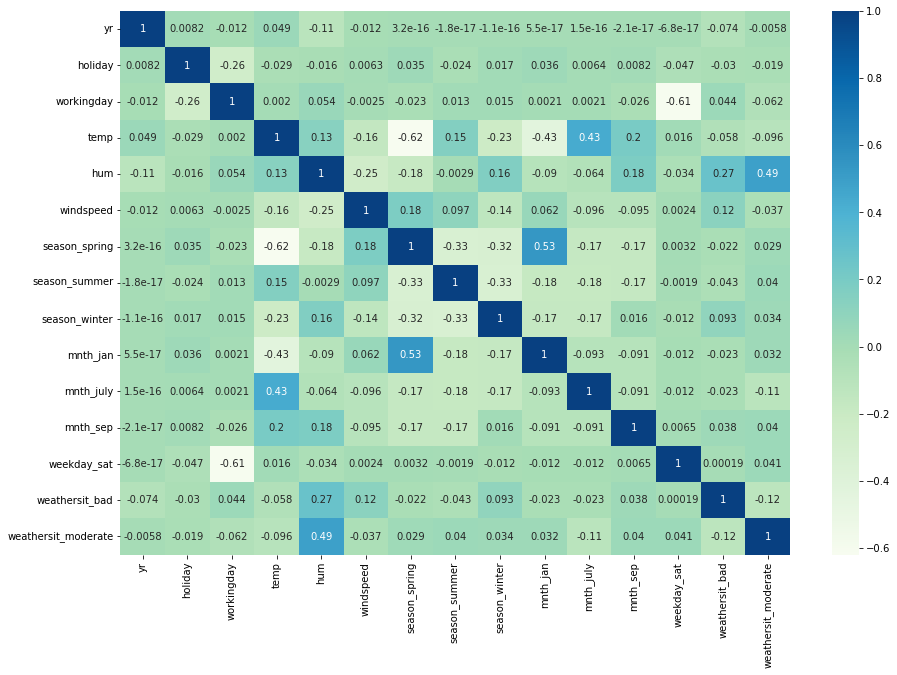

In [515]:
# plot heatmap to check correlation and impact of variables selected by RFE with target column. 

plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## 6.2 Model 2

In [516]:
# dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.35e-182
Time:                        22:03:45   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

## 6.3 Model 3
All columns have P-Value > 0.5 so checking VIFs next

In [517]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          3.37e-180
Time:                        22:03:45   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

## 6.4 Model 4

In [518]:
# dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.51e-178
Time:                        22:03:45   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

## 6.5 Model 5

In [519]:
# dropping the variable mnth_july as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.20e-179
Time:                        22:03:45   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

## 6.6 Model 6

In [520]:
# dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          4.14e-147
Time:                        22:03:45   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

## 6.7 Model 7

In [521]:
# replacing mnth_july with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_july',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.84e-92
Time:                        22:03:45   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

## 6.8 Model 8

In [522]:
# replacing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_july',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.75e-142
Time:                        22:03:45   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

## 6.9 Model 9

In [523]:
# using weekday_sun which was dropped during RFE instead of weekday_sat

cols = ['yr', 'workingday', 'season_spring', 'mnth_july',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          3.20e-142
Time:                        22:03:45   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

## 6.10 Model 10

In [524]:
# adding temp, removing season_summer and workingday
cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.73e-178
Time:                        22:03:45   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

#### Inferences:
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.816 
Let us select Model 10 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi colinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [525]:
# function to build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

## 6.11 Final Model

In [526]:
# building the final model using sklearn

cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164268 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


# 7. Model Evaluation

## 7.1 Residual Analysis

In [527]:
y_train_pred = lr.predict(X_train[cols])

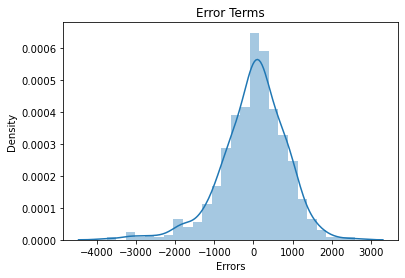

In [528]:
# plotting a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)

#### Inference:
Errors are normally distributed with mean=0.

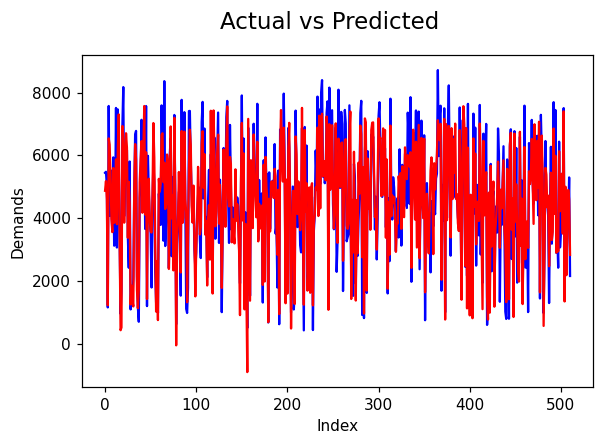

In [529]:
# actual vs Predicted

c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(6,4),dpi=110)
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Inference:
Actual(blue) and Predicted(red) values are almost the same, so we can say that this model is good

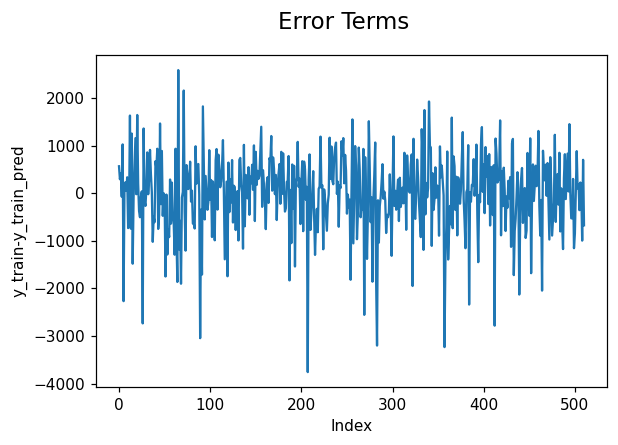

In [530]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(6,4),dpi=110)
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [531]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8158045196281631

#### R2 value obtained here (0.8158 ~ 0.816) is the same as what we got in our Final Model 

## 7.2 Check for Linearity

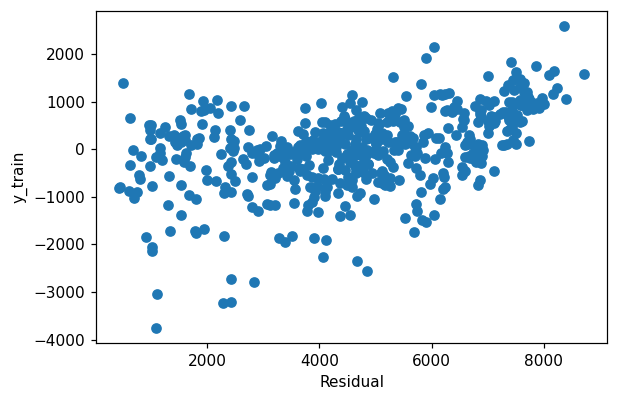

In [532]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.figure(figsize=(6,4),dpi=110)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## 7.3 Predict Values for Test Data

In [533]:
# scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

# test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [534]:
# columns from our final model
cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

# predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## 7.4 R-squared Value for Test Predictions

In [535]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8127228702995221

## 7.5 Homoscedasticity

#### R2 value for predictions on test data (0.813) is almost same as R2 value of train data (0.816). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)


Text(0, 0.5, 'y_test_pred')

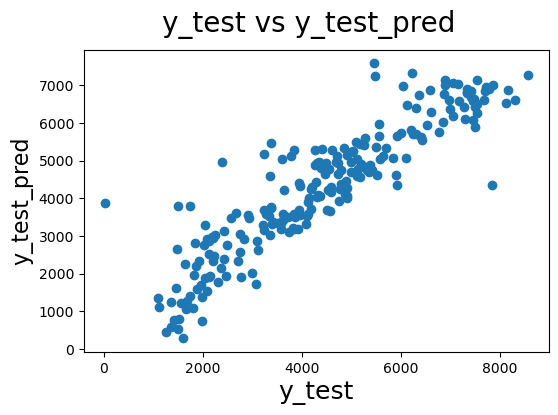

In [536]:
# plotting y_test and y_test_pred to understand the spread

fig = plt.figure(figsize=(6,4),dpi=100)
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

#### Inference:
We can observe that variance of the residuals (error terms) is constant across predictions, i.e. the error term does not vary much as the value of the predictor variable changes.

## 7.6 Plot Test vs. Predicted Test Values

In [537]:
# function to plot Actual vs Predicted
# takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(13,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

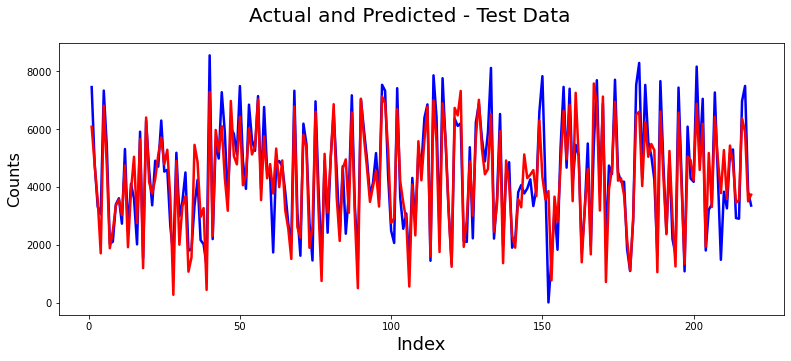

In [538]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Inference:
Predictions for Test data is very close to Actual data

## 7.7 Plot Error Terms for Test Data

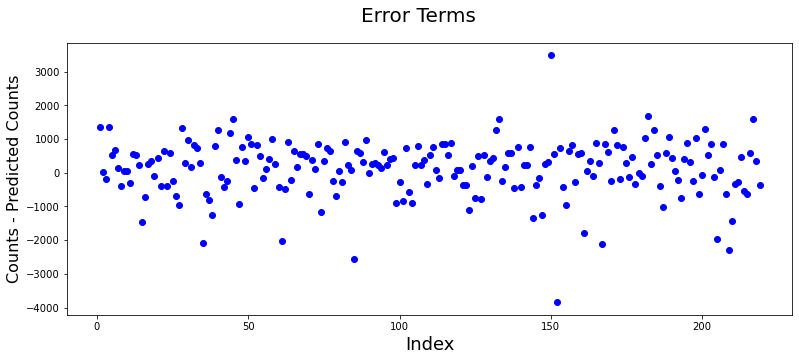

In [539]:
# function for plotting error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(13,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts - Predicted Counts', fontsize=16)
    
plot_err_terms(y_test,y_test_pred)

#### Inference:
As we can see the error terms are randomly distributed, there is no pattern. this means the output is explained well by the model and there are no other parameters that can explain the model better.

# 8. Making Predictions and Interpreting Results

In [540]:
# Checking data before scaling
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [541]:
# rebuilding the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.73e-178
Time:                        22:03:46   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

### Analysing the above model, the comapany should focus on the following:

- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have an increase in number of users once Covid situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having much business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during Spring when the weather is pleasant and also advertise a little more for September as this is when business would be at its best.

# 9. Conclusion

### Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)